In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
alumnos_path = './data/Alumnos.csv'
alumnos_df = pd.read_csv(alumnos_path, encoding='utf-8', delimiter=';')
alumnos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37861 entries, 0 to 37860
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   APELLIDOS Y NOMBRES           37861 non-null  object 
 1   CÓDIGO ALUMNO                 37861 non-null  object 
 2   FACULTAD                      37861 non-null  object 
 3   TIPO DOC.                     37861 non-null  object 
 4   DOC. IDENTIDAD                37860 non-null  object 
 5   CORREO INSTITUCIONAL          37861 non-null  object 
 6   CRÉDITOS APROBADOS            37861 non-null  float64
 7   UBICACIÓN RANKING FACULTAD    37861 non-null  float64
 8   PERTENECE AL TERCIO SUPERIOR  37861 non-null  object 
 9   PAÍS NACIMIENTO               37861 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.9+ MB


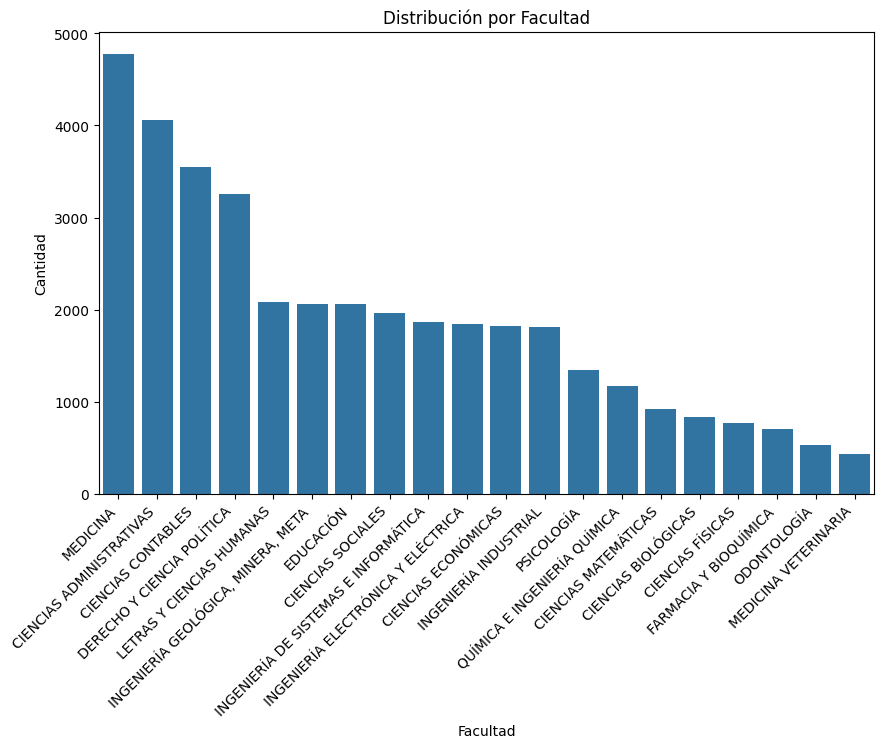

In [14]:
# 1. Visualización básica de datos
def visualizar_datos(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='FACULTAD', order=df['FACULTAD'].value_counts().index)
    plt.title('Distribución por Facultad')
    plt.xlabel('Facultad')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, ha='right')
    plt.show()

visualizar_datos(alumnos_df)

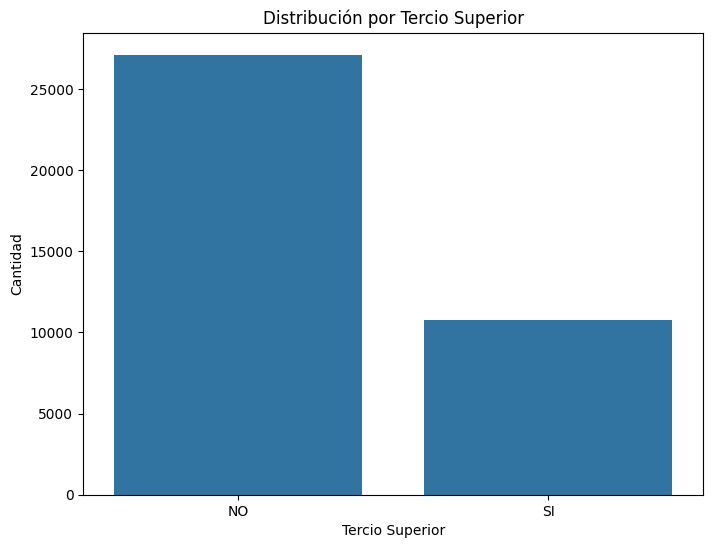

In [15]:
def visualizar_por_tercio_superior(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='PERTENECE AL TERCIO SUPERIOR', order=df['PERTENECE AL TERCIO SUPERIOR'].value_counts().index)
    plt.title('Distribución por Tercio Superior')
    plt.xlabel('Tercio Superior')
    plt.ylabel('Cantidad')
    plt.show()

visualizar_por_tercio_superior(alumnos_df)

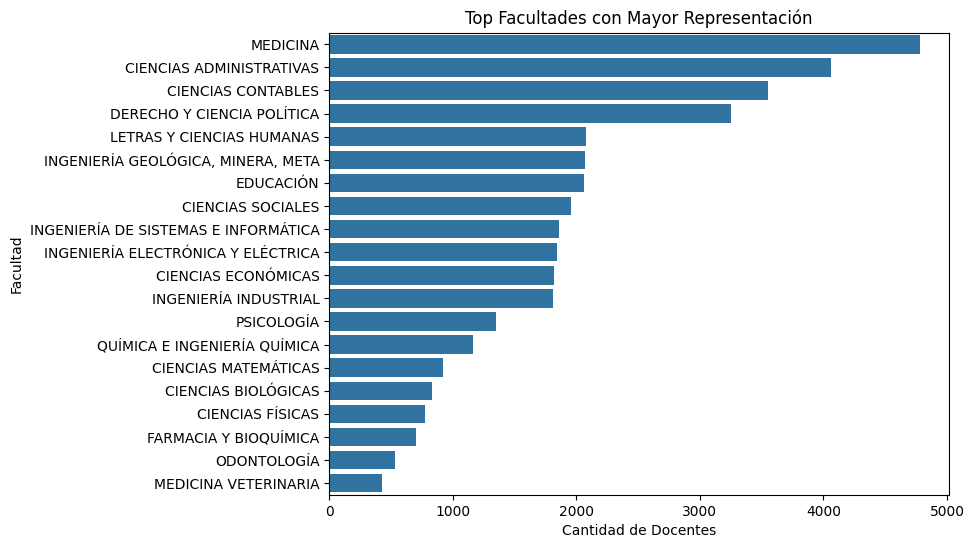

In [ ]:
def top_facultades(df):
    facultades = df['FACULTAD'].value_counts().reset_index()
    facultades.columns = ['Facultad', 'Cantidad']
    plt.figure(figsize=(8, 6))
    sns.barplot(data=facultades, x='Cantidad', y='Facultad')
    plt.title('Top Facultades con más Docentes')
    plt.xlabel('Cantidad de Docentes')
    plt.ylabel('Facultad')
    plt.show()

top_facultades(alumnos_df)

In [18]:
alumnos_df

,APELLIDOS Y NOMBRES,CÓDIGO ALUMNO,FACULTAD,TIPO DOC.,DOC. IDENTIDAD,CORREO INSTITUCIONAL,CRÉDITOS APROBADOS,UBICACIÓN RANKING FACULTAD,PERTENECE AL TERCIO SUPERIOR,PAÍS NACIMIENTO
0,ABAD CONDORI DANITZA ROCIO,24010364,MEDICINA,DNI,71311644,danitza.abad@unmsm.edu.pe,23.0,2914.0,SI,PERÚ
1,ABAL DE LA CRUZ WILDER LUCIO,24017426,MEDICINA,DNI,7431430,wilder.abal@unmsm.edu.pe,18.0,700.0,NO,PERÚ
2,ABANTO AYALA LARISSA TAMARA,23010455,MEDICINA,DNI,74749785,larissa.abanto@unmsm.edu.pe,70.0,2904.0,SI,PERÚ
3,ABANTO CHAVEZ EILEEN SANDY,23010262,MEDICINA,DNI,60722225,eileen.abanto@unmsm.edu.pe,71.0,3199.0,SI,PERÚ
4,ABANTO FORTUNA ANGEL LEANDRO,23010263,MEDICINA,DNI,63352583,angel.abantof@unmsm.edu.pe,50.0,48.0,NO,ESPAÑA
...,...,...,...,...,...,...,...,...,...,...
37856,ZEVALLOS LOPEZ JHOSUE MAURICIO,21100065,CIENCIAS BIOLÓGICAS,DNI,70699100,jhosue.zevallos@unmsm.edu.pe,157.0,497.0,NO,PERÚ
37857,ZEVALLOS VÁSQUEZ GIANELLA GERALDINE,15100036,CIENCIAS BIOLÓGICAS,DNI,75171163,gianella.zevallos@unmsm.edu.pe,184.0,126.0,NO,PERÚ
37858,ZOLFI RODRIGUEZ FIORELLA SOFIA,20100046,CIENCIAS BIOLÓGICAS,DNI,76850729,fiorella.zolfi@unmsm.edu.pe,194.0,598.0,SI,PERÚ
37859,ZUÑIGA HUERTAS KIARA NAYSHA,20100040,CIENCIAS BIOLÓGICAS,DNI,74583291,kiara.zuniga@unmsm.edu.pe,197.0,246.0,NO,PERÚ


In [19]:
# Codificación de datos categóricos
le_facultad = LabelEncoder()
le_tercio = LabelEncoder()

alumnos_df['FACULTAD'] = le_facultad.fit_transform(alumnos_df['FACULTAD'])
alumnos_df['PERTENECE AL TERCIO SUPERIOR'] = le_tercio.fit_transform(alumnos_df['PERTENECE AL TERCIO SUPERIOR'])

In [20]:
# Separar características (X) y etiqueta (y)
X = alumnos_df[['FACULTAD', 'CRÉDITOS APROBADOS', 'UBICACIÓN RANKING FACULTAD']]
y = alumnos_df['PERTENECE AL TERCIO SUPERIOR']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamiento de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos a entrenar
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Bosque Aleatorio": RandomForestClassifier(random_state=42),
    "Máquina de Soporte Vectorial (SVM)": SVC(random_state=42)
}

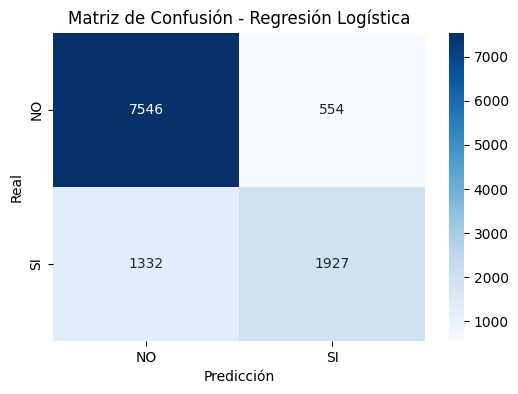

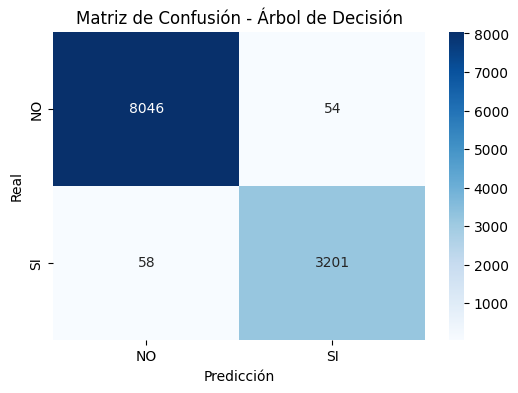

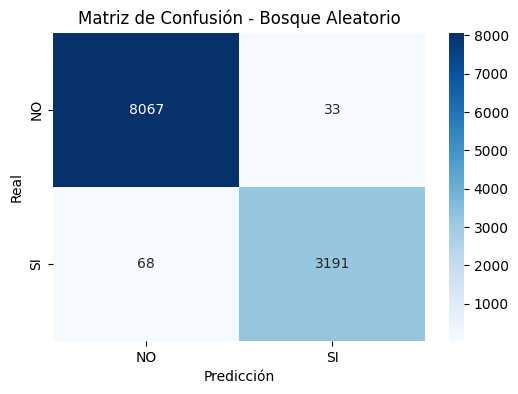

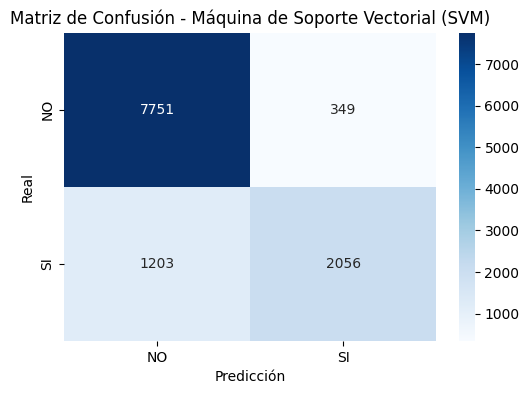

In [24]:
# Entrenar y evaluar modelos
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Guardar resultados
    resultados[nombre] = {
        "Exactitud (Accuracy)": accuracy,
        "Precisión": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Reporte de Clasificación": classification_report(y_test, y_pred, output_dict=True),
        "Matriz de Confusión": confusion_matrix(y_test, y_pred)
    }

metricas_df = pd.DataFrame({
    nombre: {
        "Exactitud (Accuracy)": datos["Exactitud (Accuracy)"],
        "Precisión": datos["Precisión"],
        "Recall": datos["Recall"],
        "F1-Score": datos["F1-Score"]
    }
    for nombre, datos in resultados.items()
}).T

# Visualizar las matrices de confusión
for nombre, datos in resultados.items():
    matriz = datos["Matriz de Confusión"]
    plt.figure(figsize=(6, 4))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le_tercio.classes_, 
                yticklabels=le_tercio.classes_)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

In [25]:
metricas_df

,Exactitud (Accuracy),Precisión,Recall
Regresión Logística,0.833964,0.828946,0.833964
Árbol de Decisión,0.990140,0.990137,0.990140
Bosque Aleatorio,0.991108,0.991103,0.991108
Máquina de Soporte Vectorial (SVM),0.863368,0.862559,0.863368
